### Setting up data frames

In [1]:
import pandas as pd
import math
import seaborn as sns
import statistics as stat


filepath_drivers = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/drivers.csv"
filepath_pitstops = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/pit_stops.csv"

drivers = pd.read_csv(filepath_drivers)
pitstops = pd.read_csv(filepath_pitstops)


### Dataframe configurations

In [2]:
pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10000)

pitstops.shape

(7638, 7)

### Data Wrangling Drivers table

In [3]:
drivers_good = drivers[drivers.code != '\\N'] # Remove all records where driver code is \N
drivers_good = drivers_good[drivers_good.number != '\\N'] # Remove all records where driver number is \N
drivers_good.shape

(45, 9)

### Merging Drivers & Pitstops data frames to perform descriptive analysis of pitstop times

In [11]:
drivers_pitstops = pd.merge(drivers_good, pitstops, how='inner', on = 'driverId') # Merge the drivers and pitstops data frames
drivers_pitstops = drivers_pitstops[drivers_pitstops.milliseconds < 50000] # Filter out extreme values
drivers_pitstops['milliseconds'] /= 1000 # Convert milliseconds to seconds
drivers_pitstops.columns = ['driverID', 'driverRef', 'Number', 'Code' , 'Forename' , 'Surname', 'DOB', 'Nationality', 'URL', 'raceId', 'Stop', 'Lap', 'Time', 'Duration', 'Seconds'] # Rename columns
top_pitstops = drivers_pitstops.sort_values(by=['Seconds'], ascending=True) #Sort by fastest pitstop time
top_pitstops_final = top_pitstops.head(30) # Capture 30 fastest pitstop times in Formula 1 History

In [24]:
fastest_fore = [x for x in top_pitstops_final.Forename] # Creating list of top 30 fastest drivers Forename
fastest_sur = [x for x in top_pitstops_final.Surname] # Creating list of top 30 fastest drivers Surname
mal_times = top_pitstops_final[top_pitstops_final.driverRef == 'maldonado'] # Separating maldonado times

### Printing descriptive analysis for 30 fastest pitstop times in Formula 1

In [27]:
print(f'Out of the {len(top_pitstops_final.index)} fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is {stat.mode(fastest_fore)} {stat.mode(fastest_sur)} ({stat.mode(top_pitstops_final.Nationality)}) with an average time of {stat.mean(mal_times.Seconds):2}')

Out of the 30 fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is Pastor Maldonado (Venezuelan) with an average time of 13.558571428571428


In [7]:
%matplotlib inline

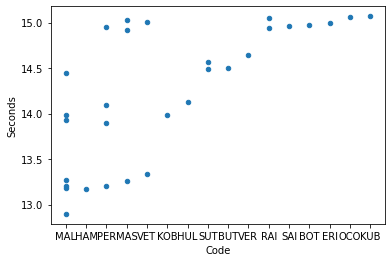

In [8]:
barchart = top_pitstops_final.plot(x='Code', y='Seconds', kind='scatter')
# histogram = drivers_pitstops.hist('Seconds')